In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [99]:
df= pd.read_csv('dataset.csv',sep=',')


In [100]:
df.head()
X=df.drop('Target', axis=1)
y=df["Target"]

In [101]:
# set the target variable as the index
df.set_index('Target', inplace=True)

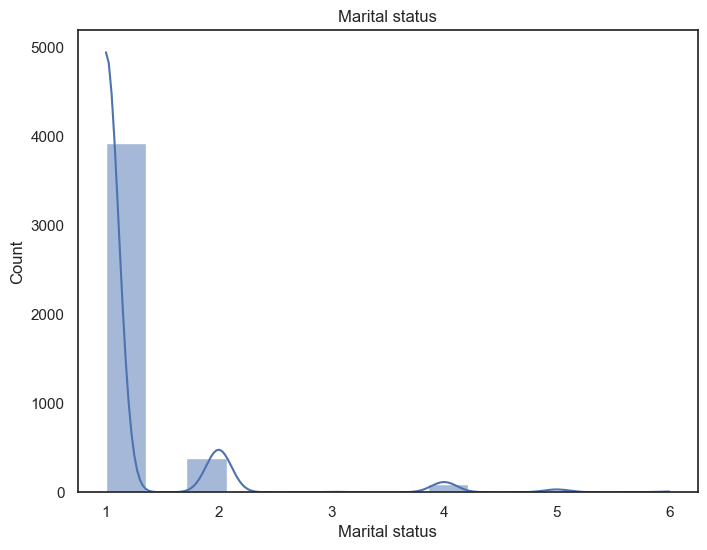

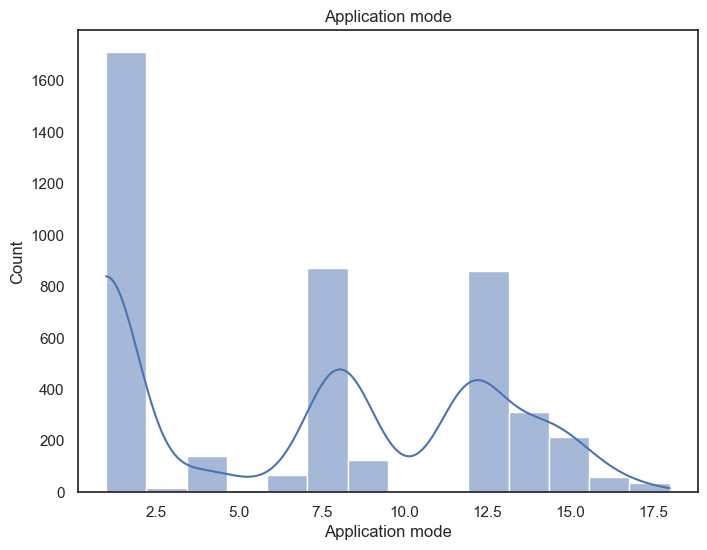

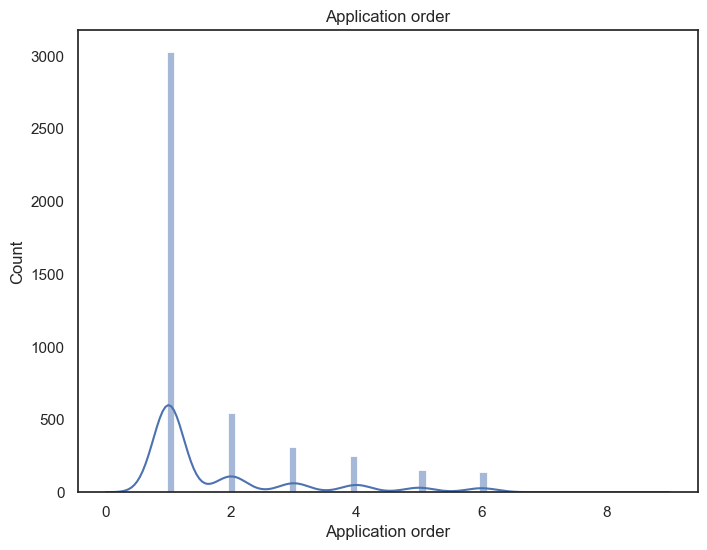

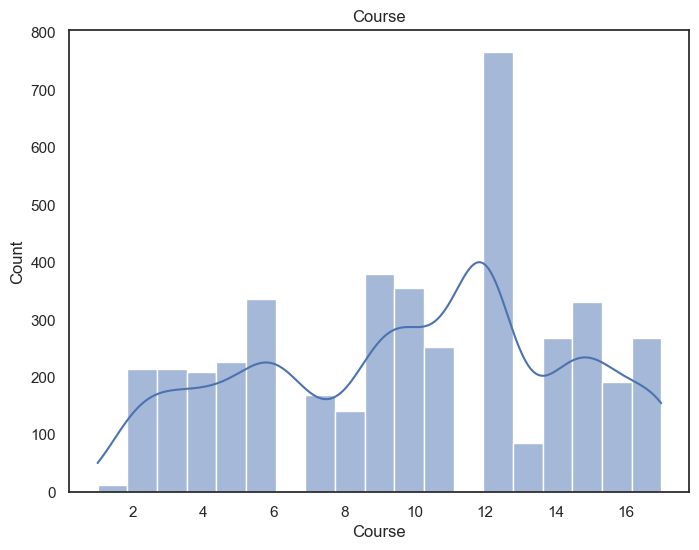

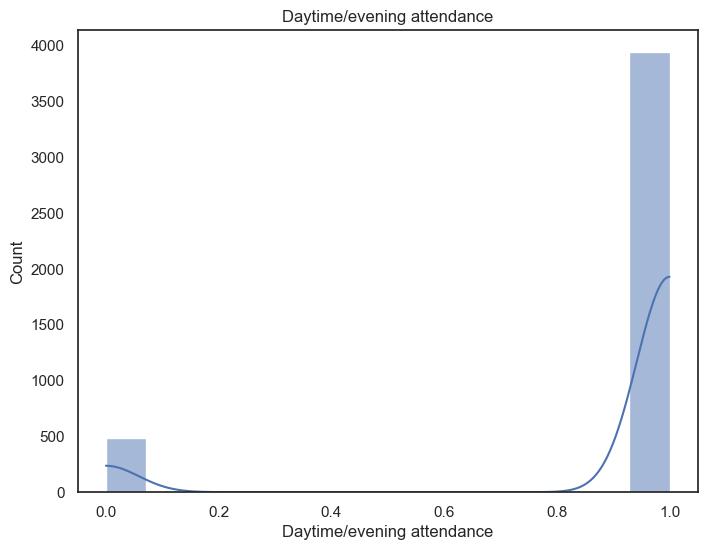

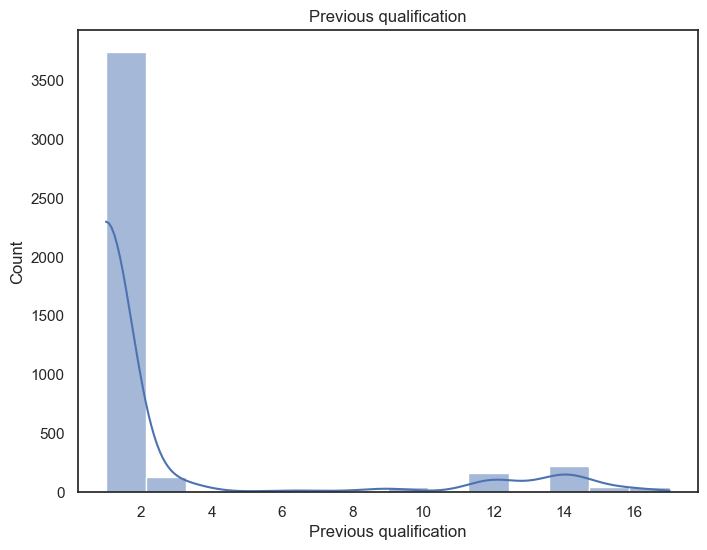

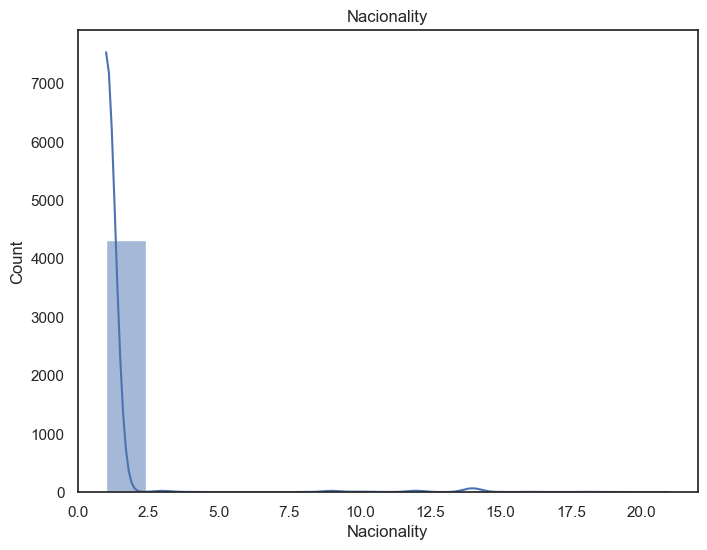

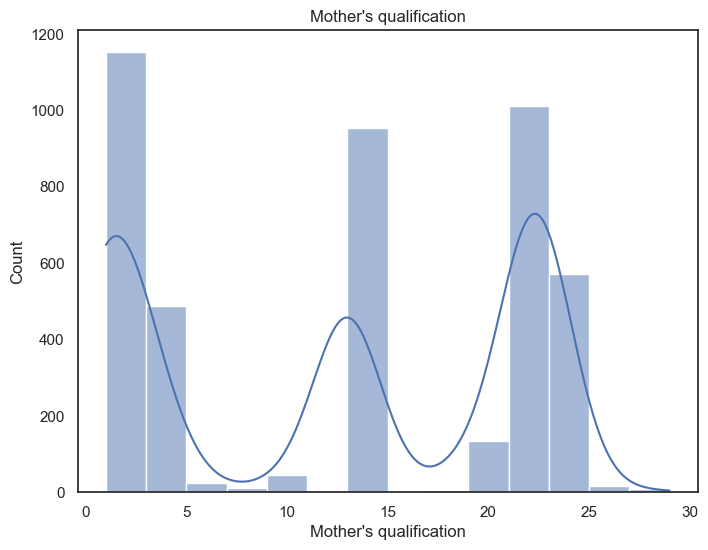

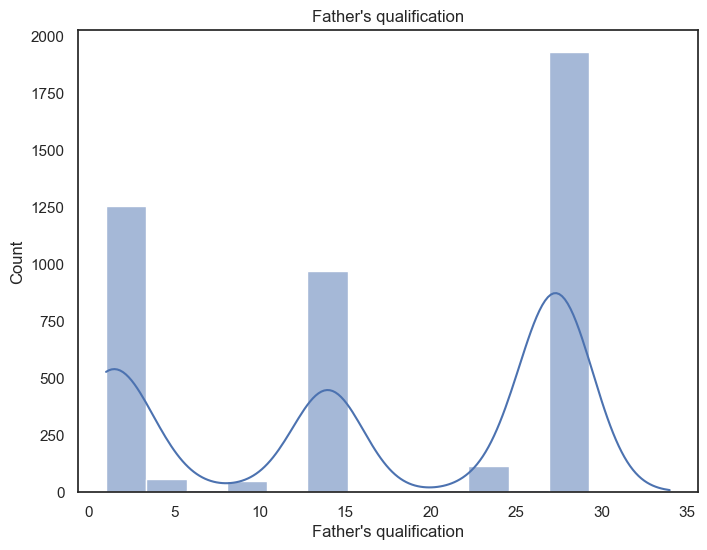

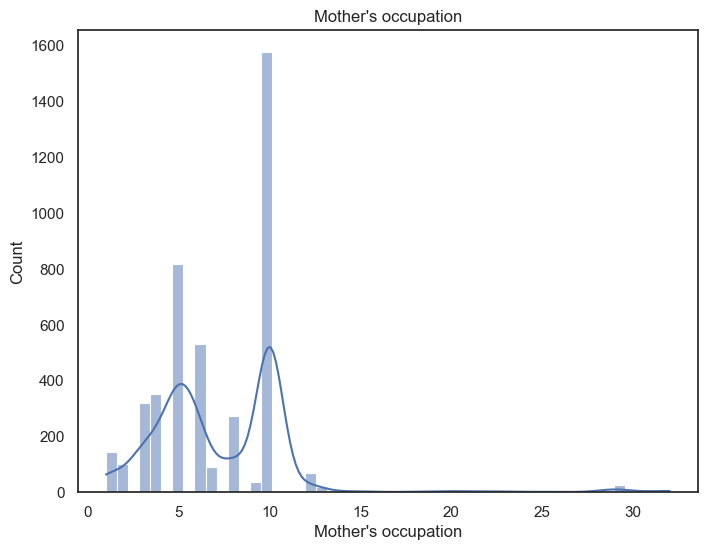

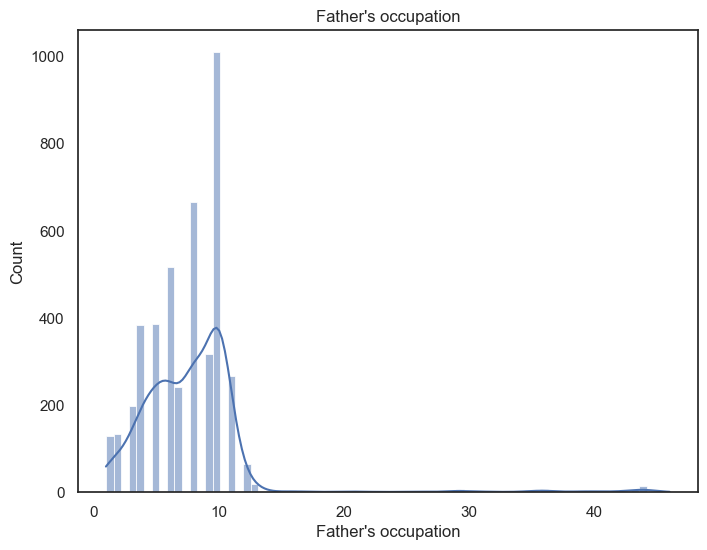

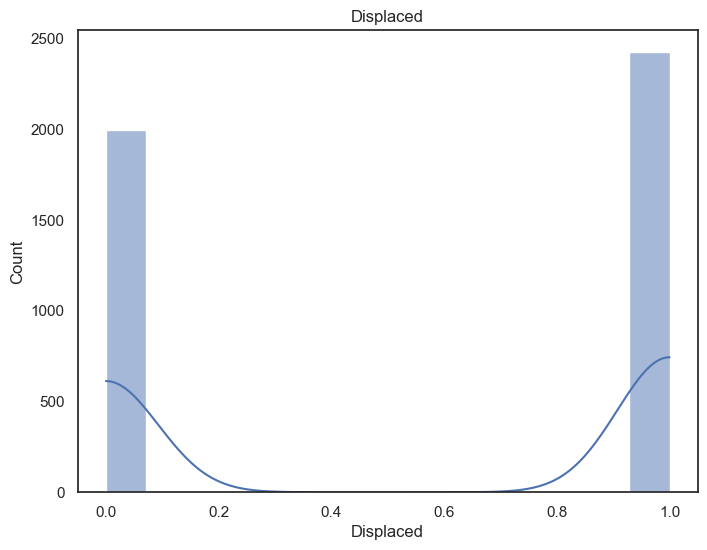

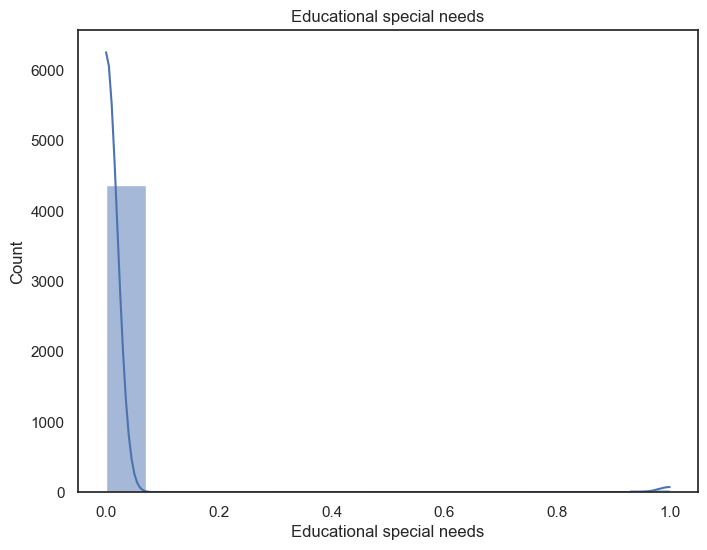

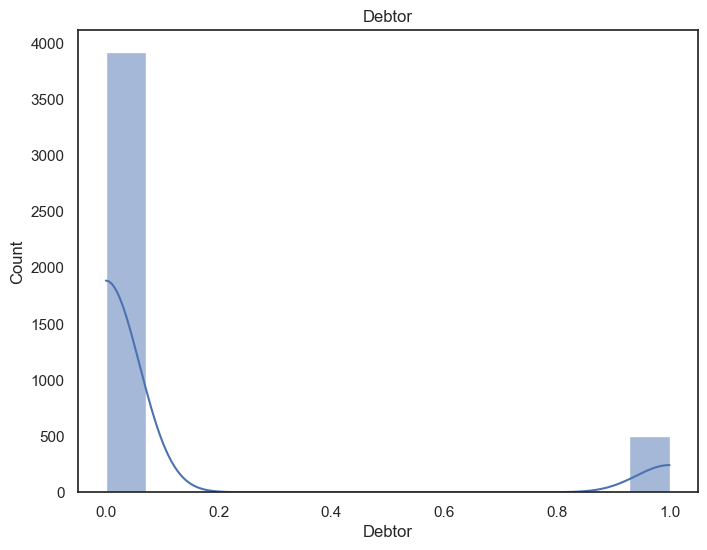

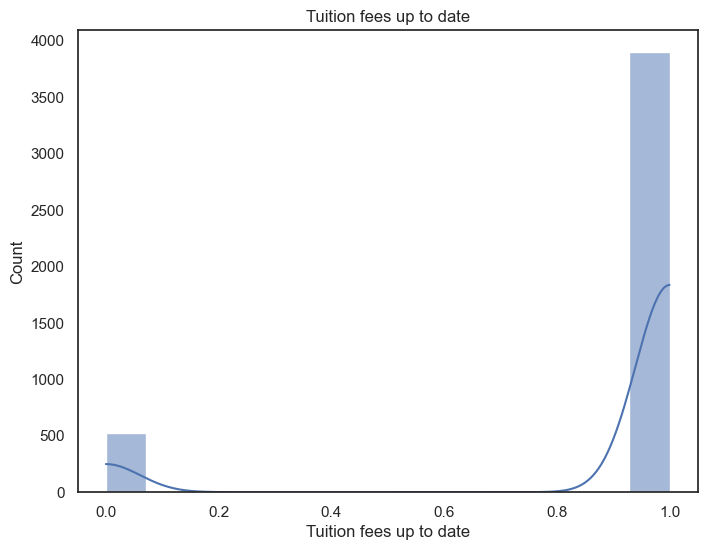

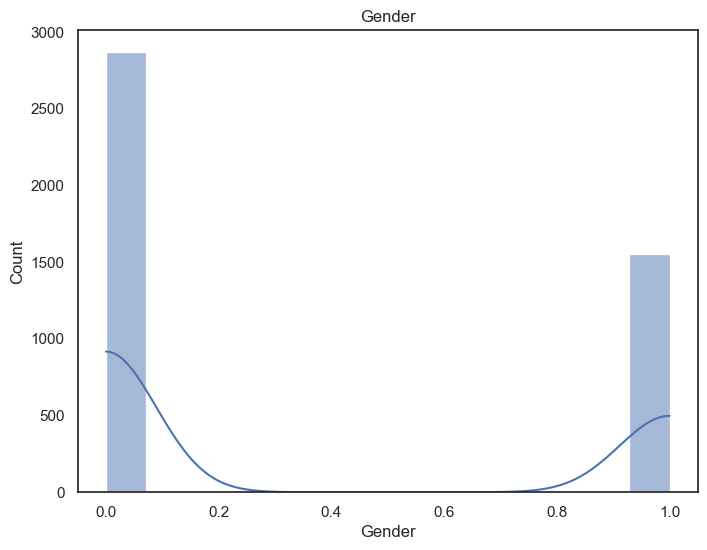

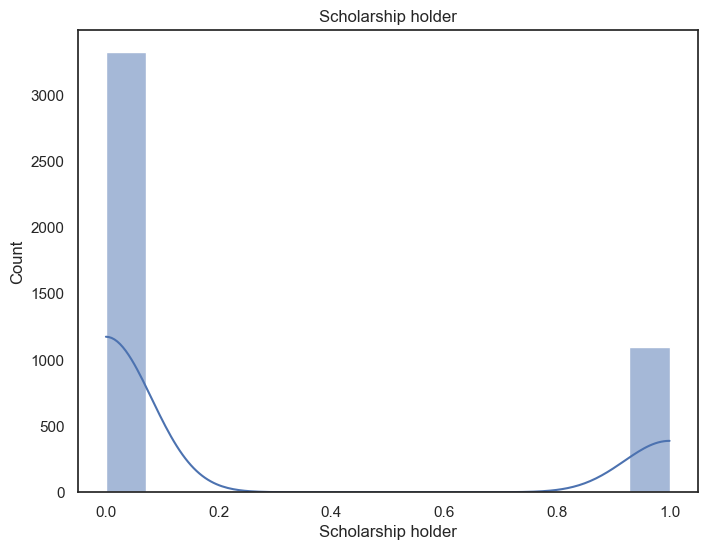

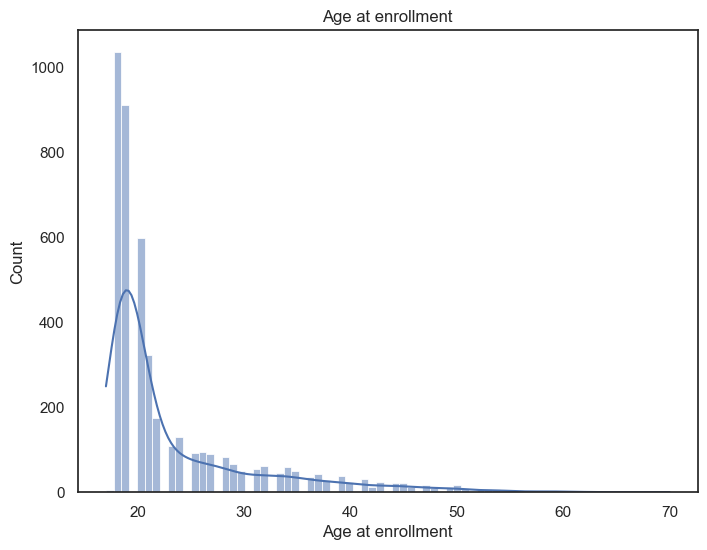

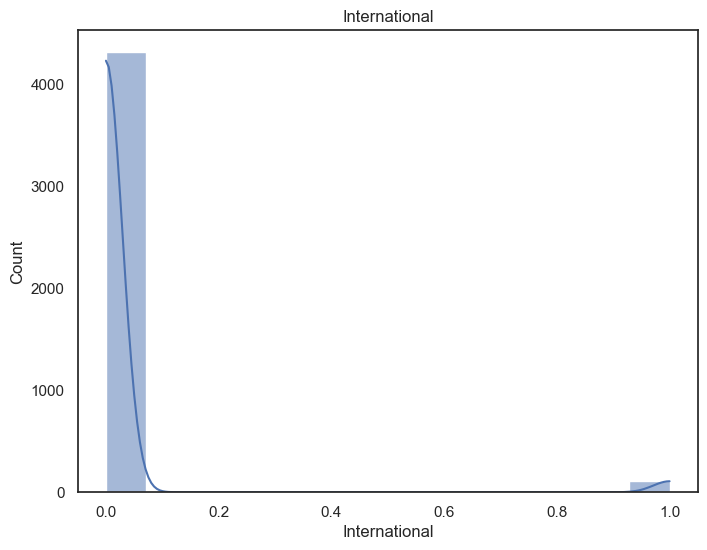

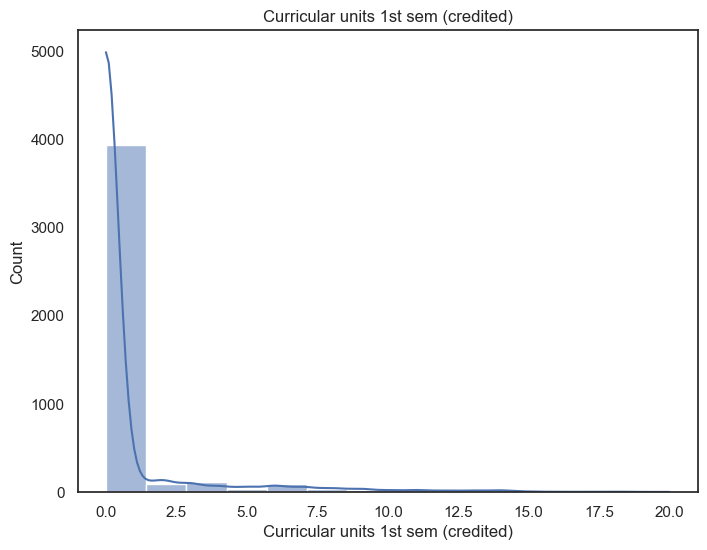

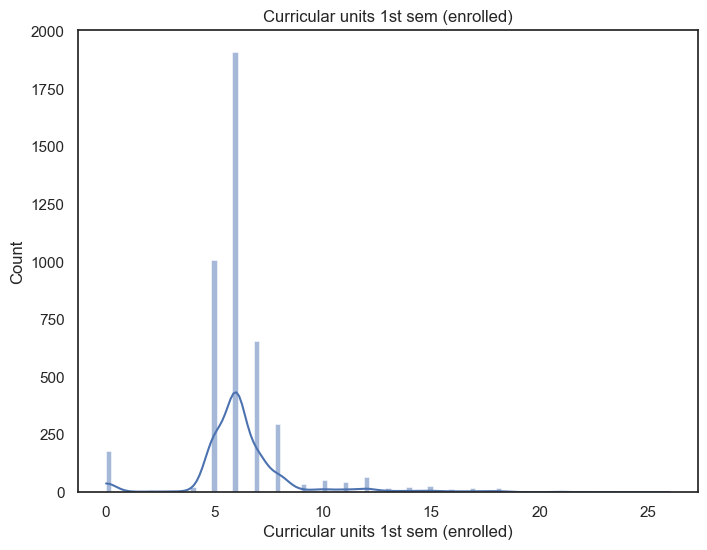

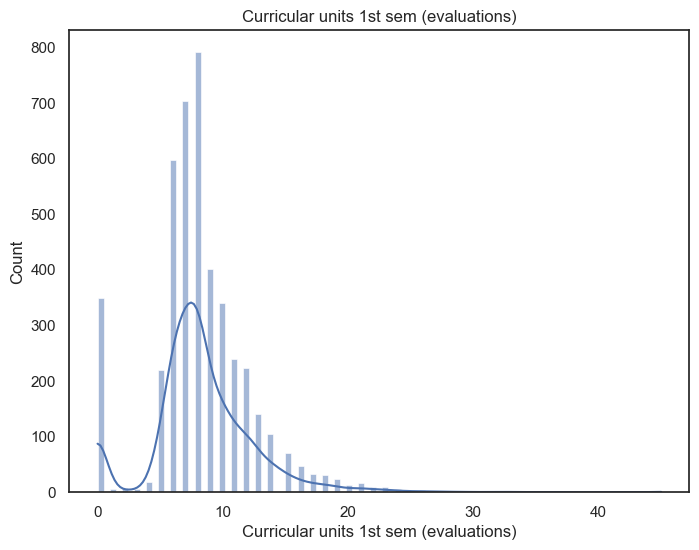

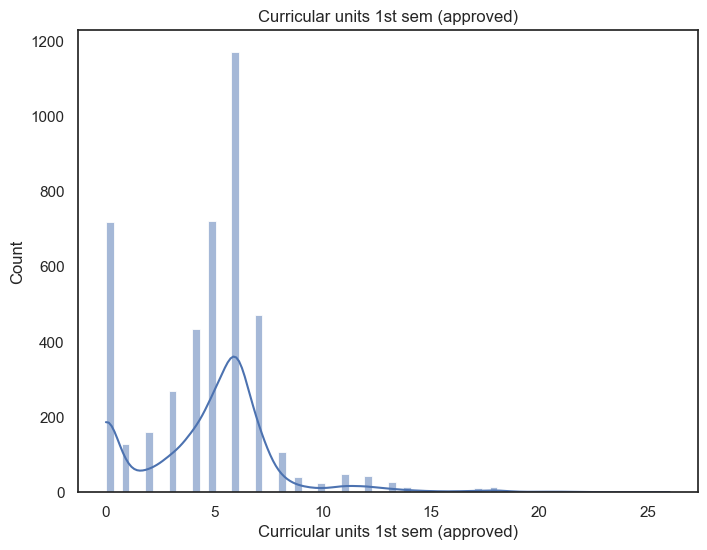

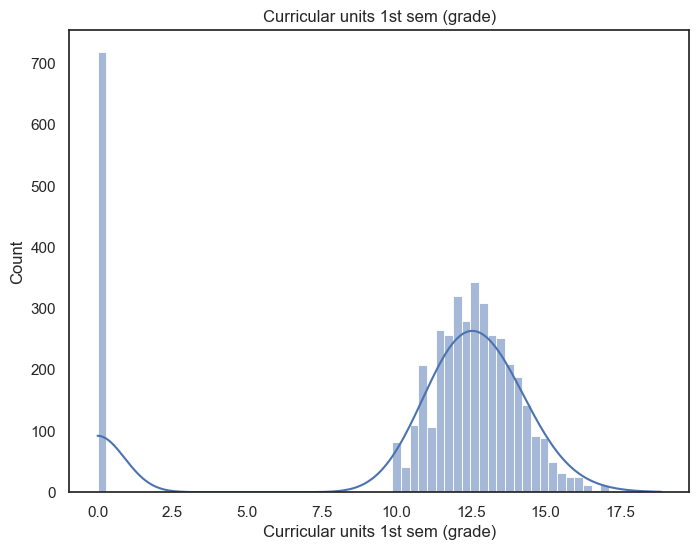

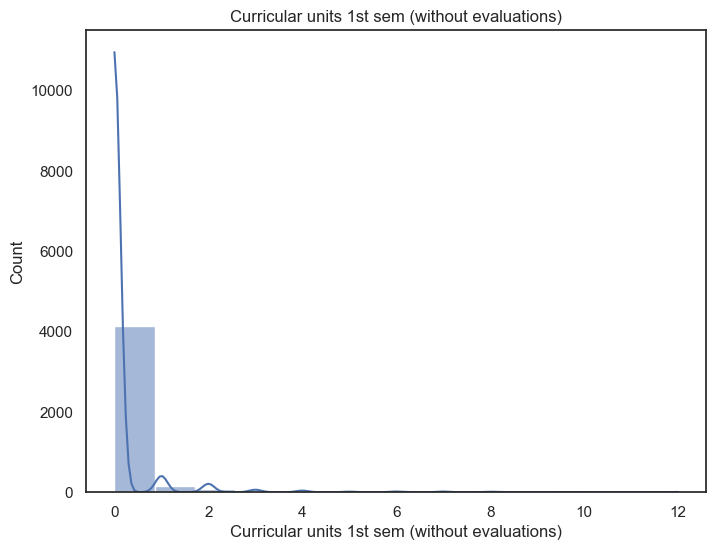

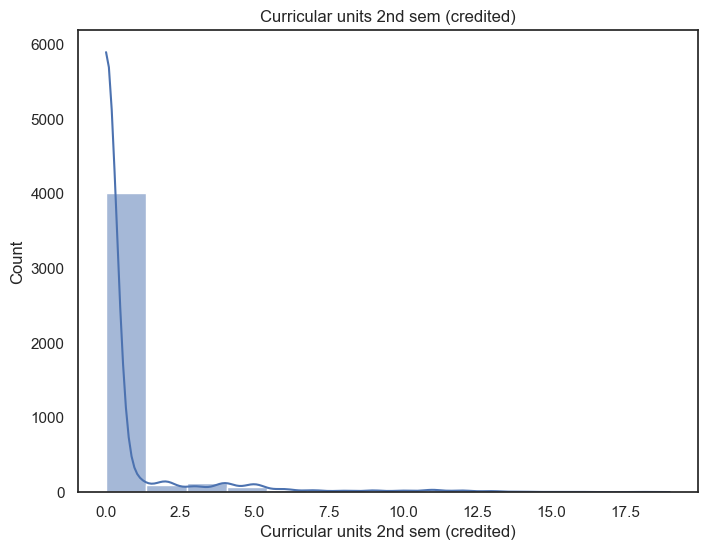

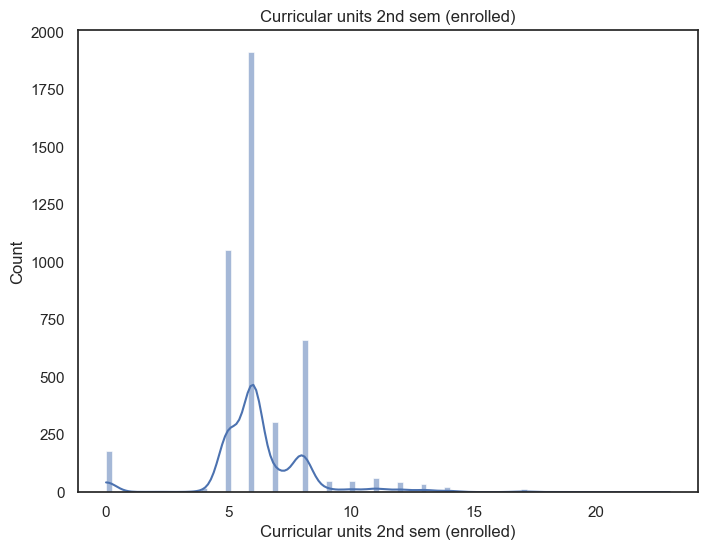

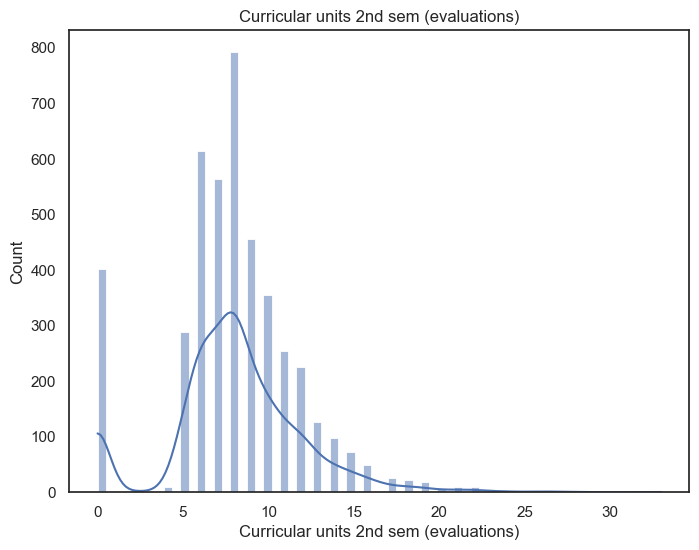

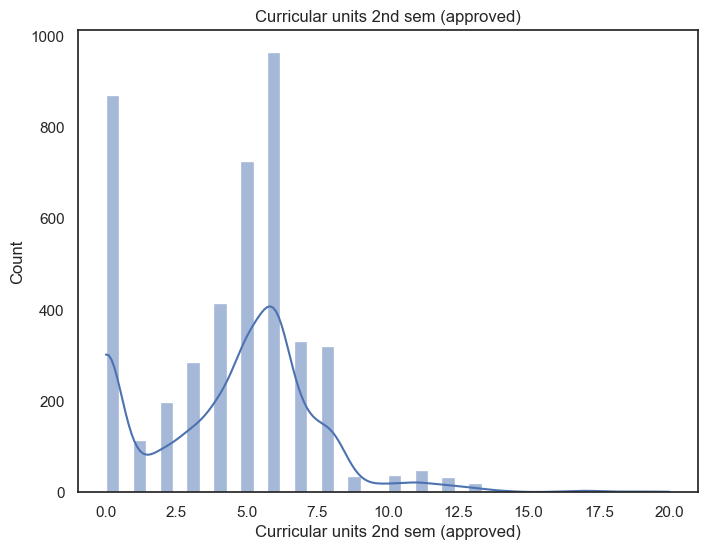

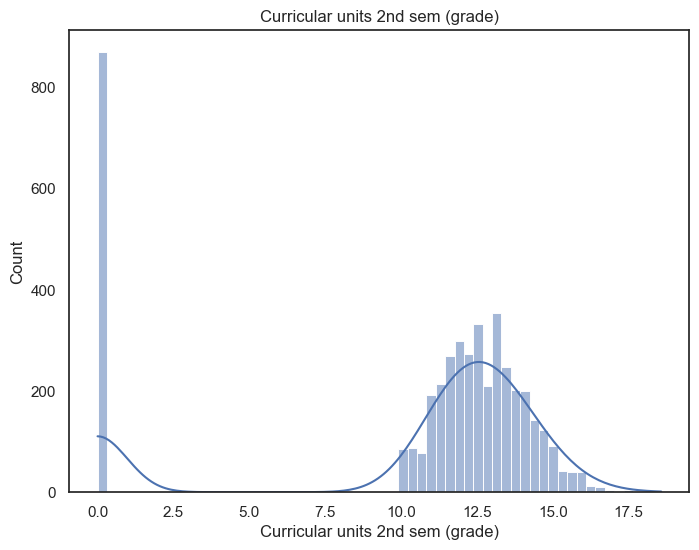

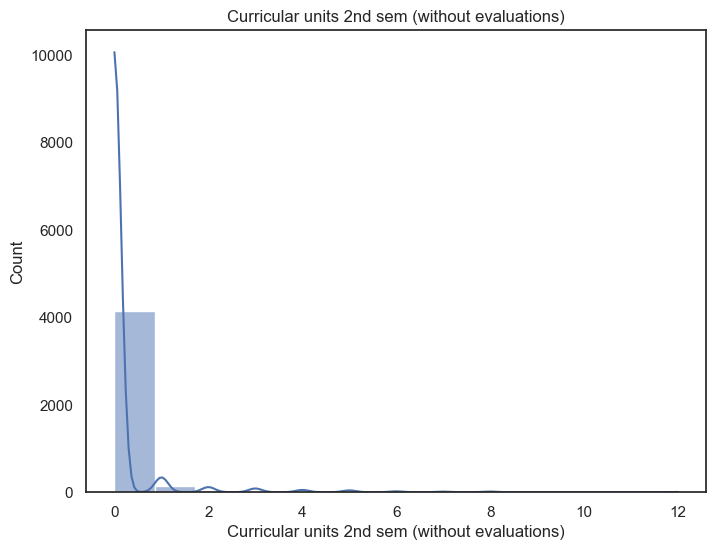

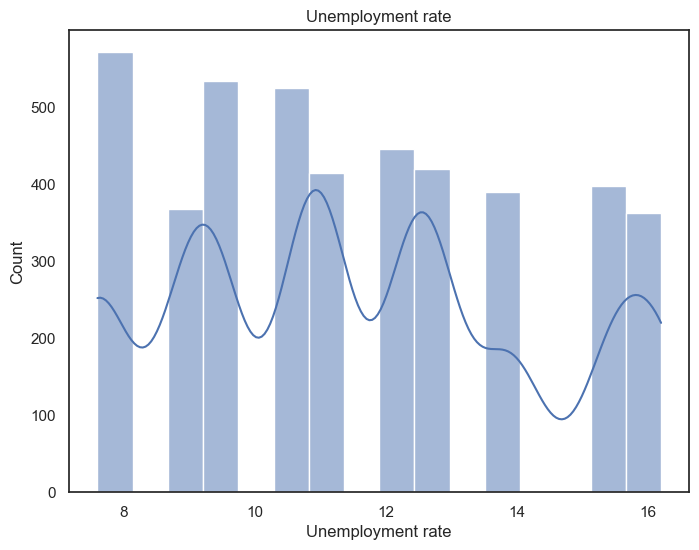

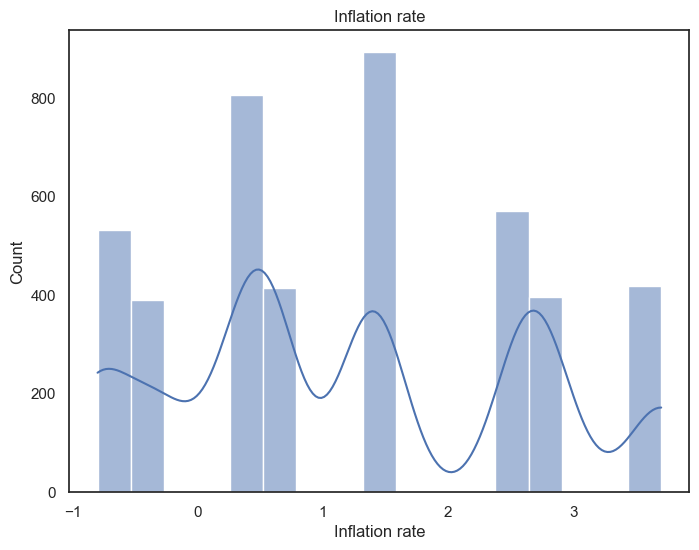

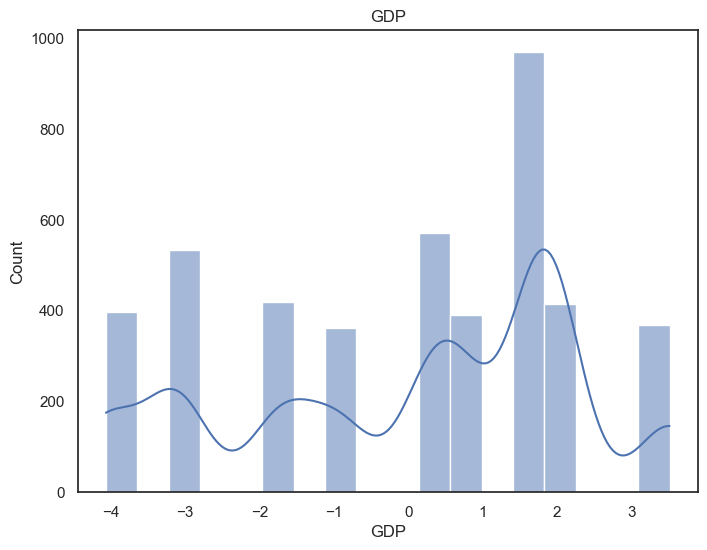

In [110]:
 #visualize the distribution of each feature
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(8,6))
        sns.countplot(data=df,x=column)
        plt.xticks(rotation=45) 
        plt.title(column)
        plt.show()
    else:
            plt.figure(figsize=(8,6))
            sns.histplot(data=df,x=column,kde=True) 
            plt.title(column)
            plt.show()
 	

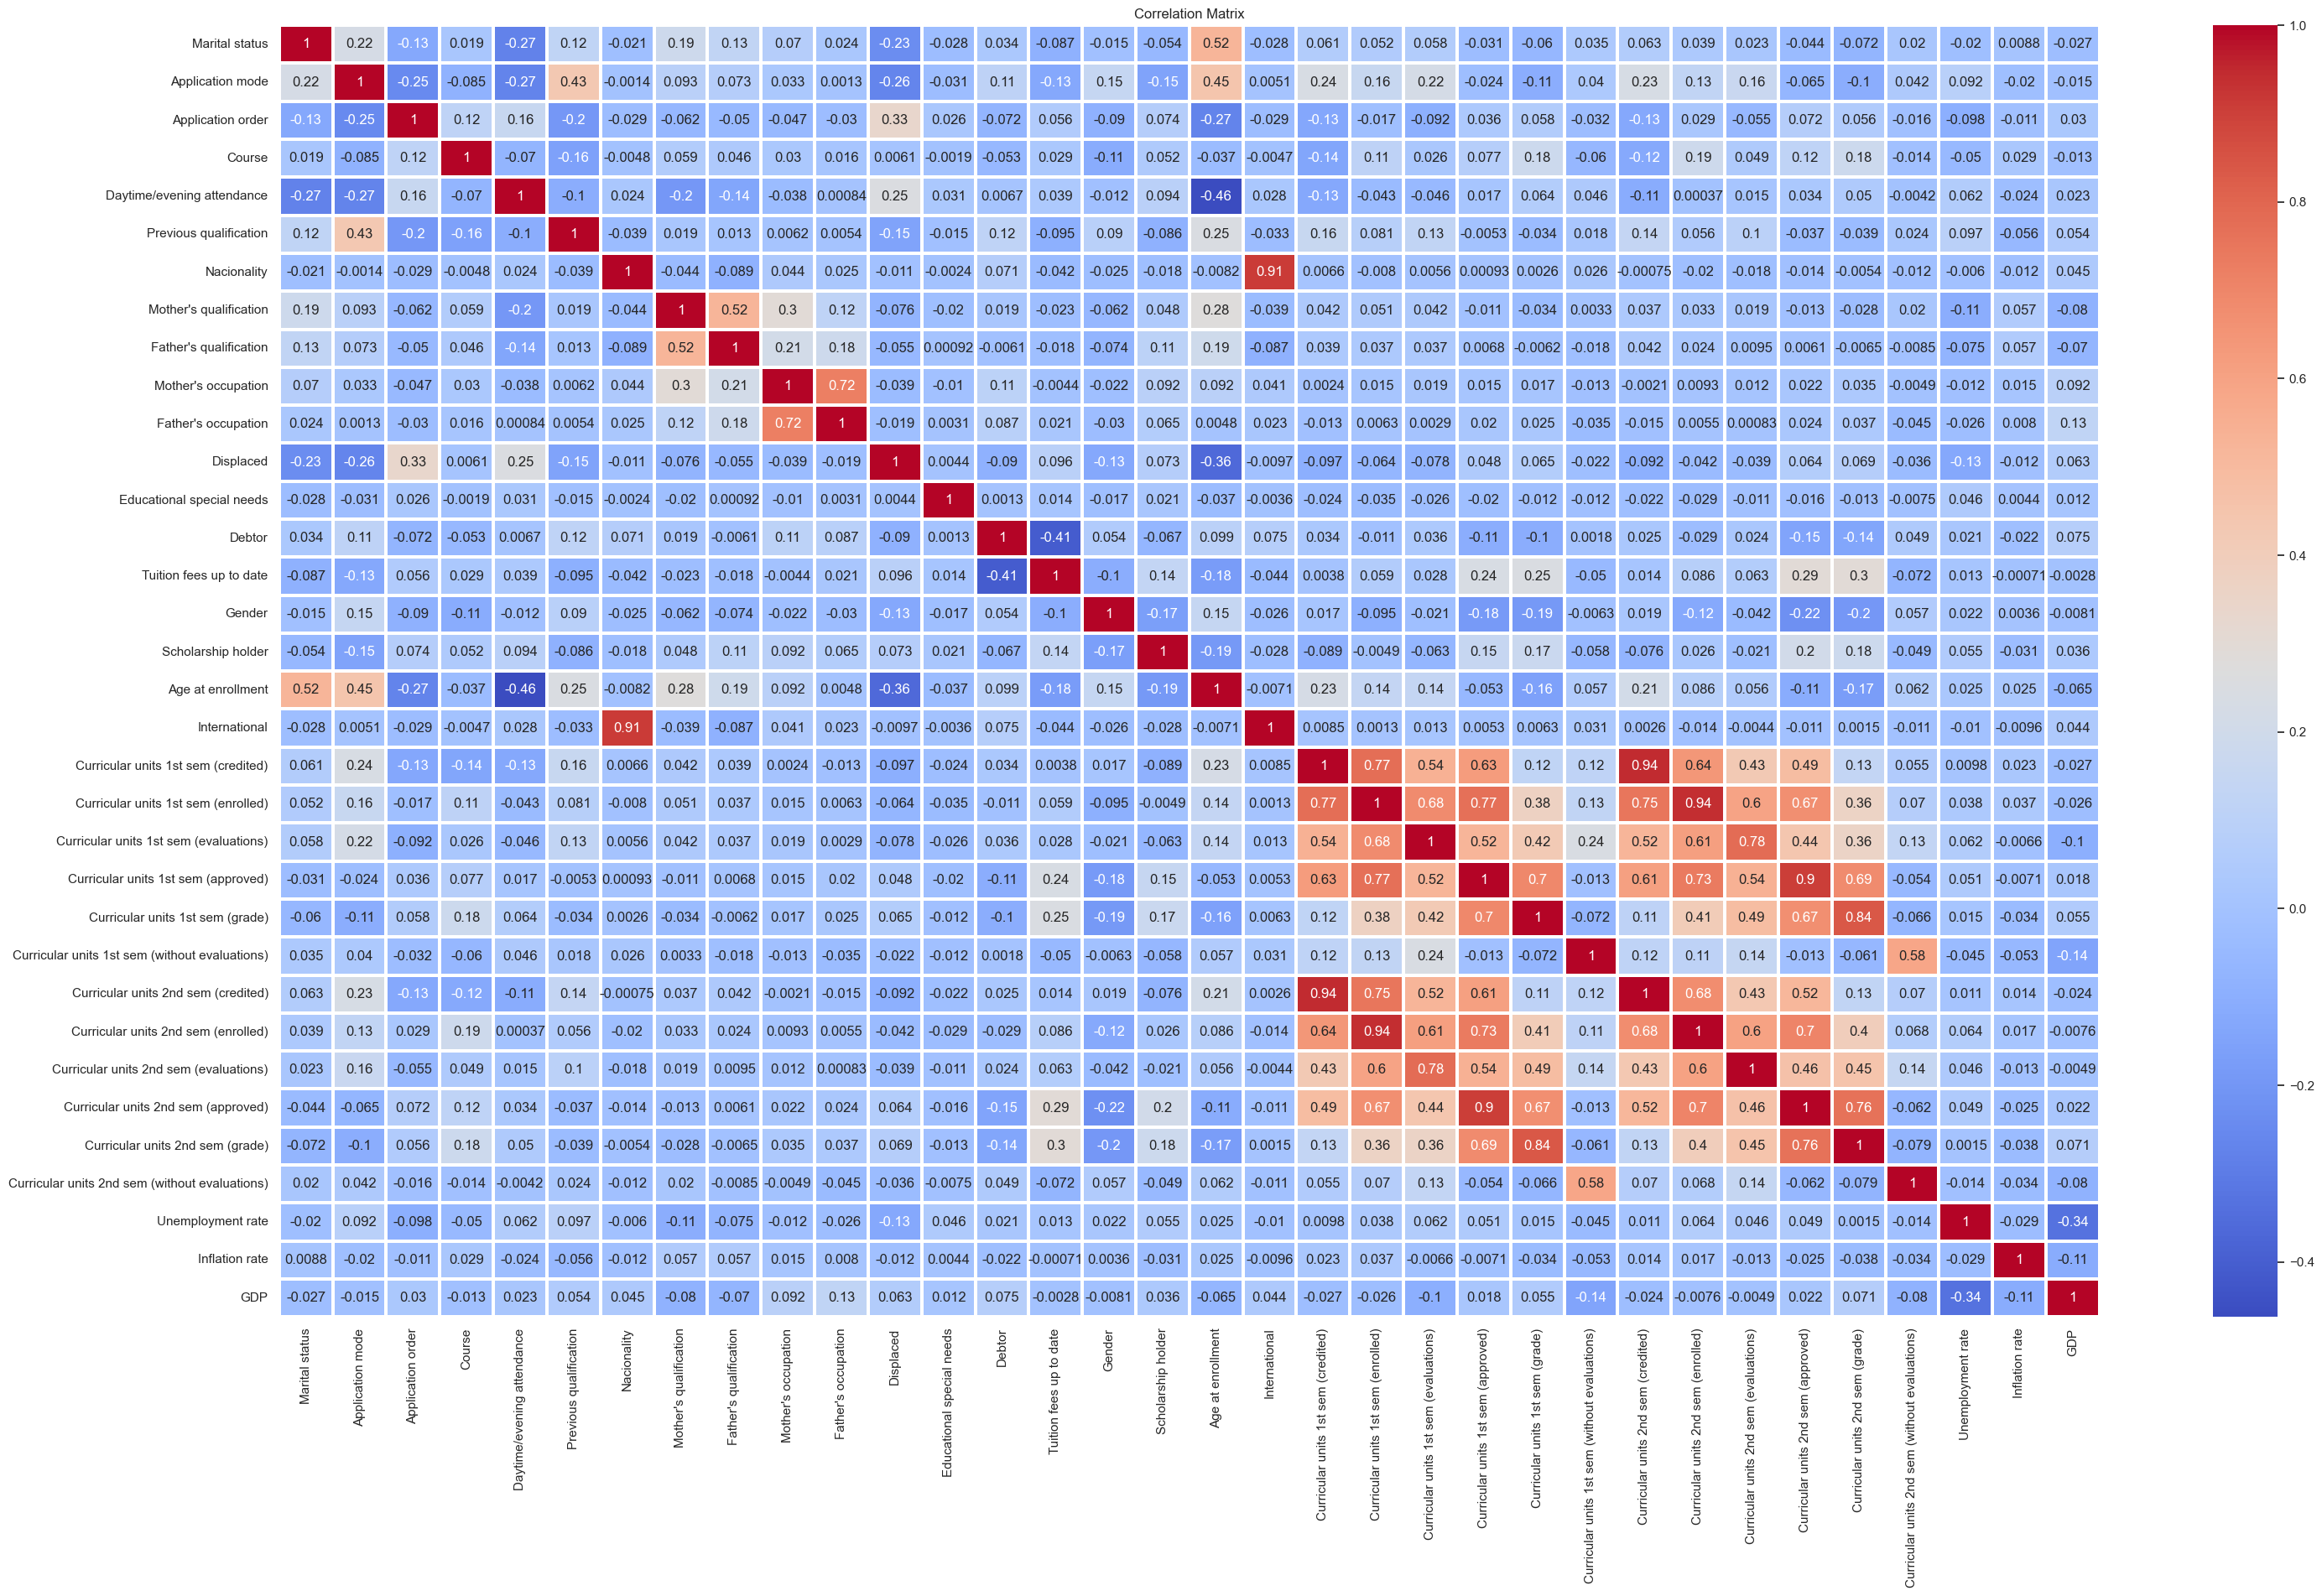

In [113]:
# compute the correlation matrix
corr = df.corr()

# plot the heatmap
sns.set(style="white")
plt.figure(figsize=(35,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1.5)
plt.title("Correlation Matrix")
plt.show()

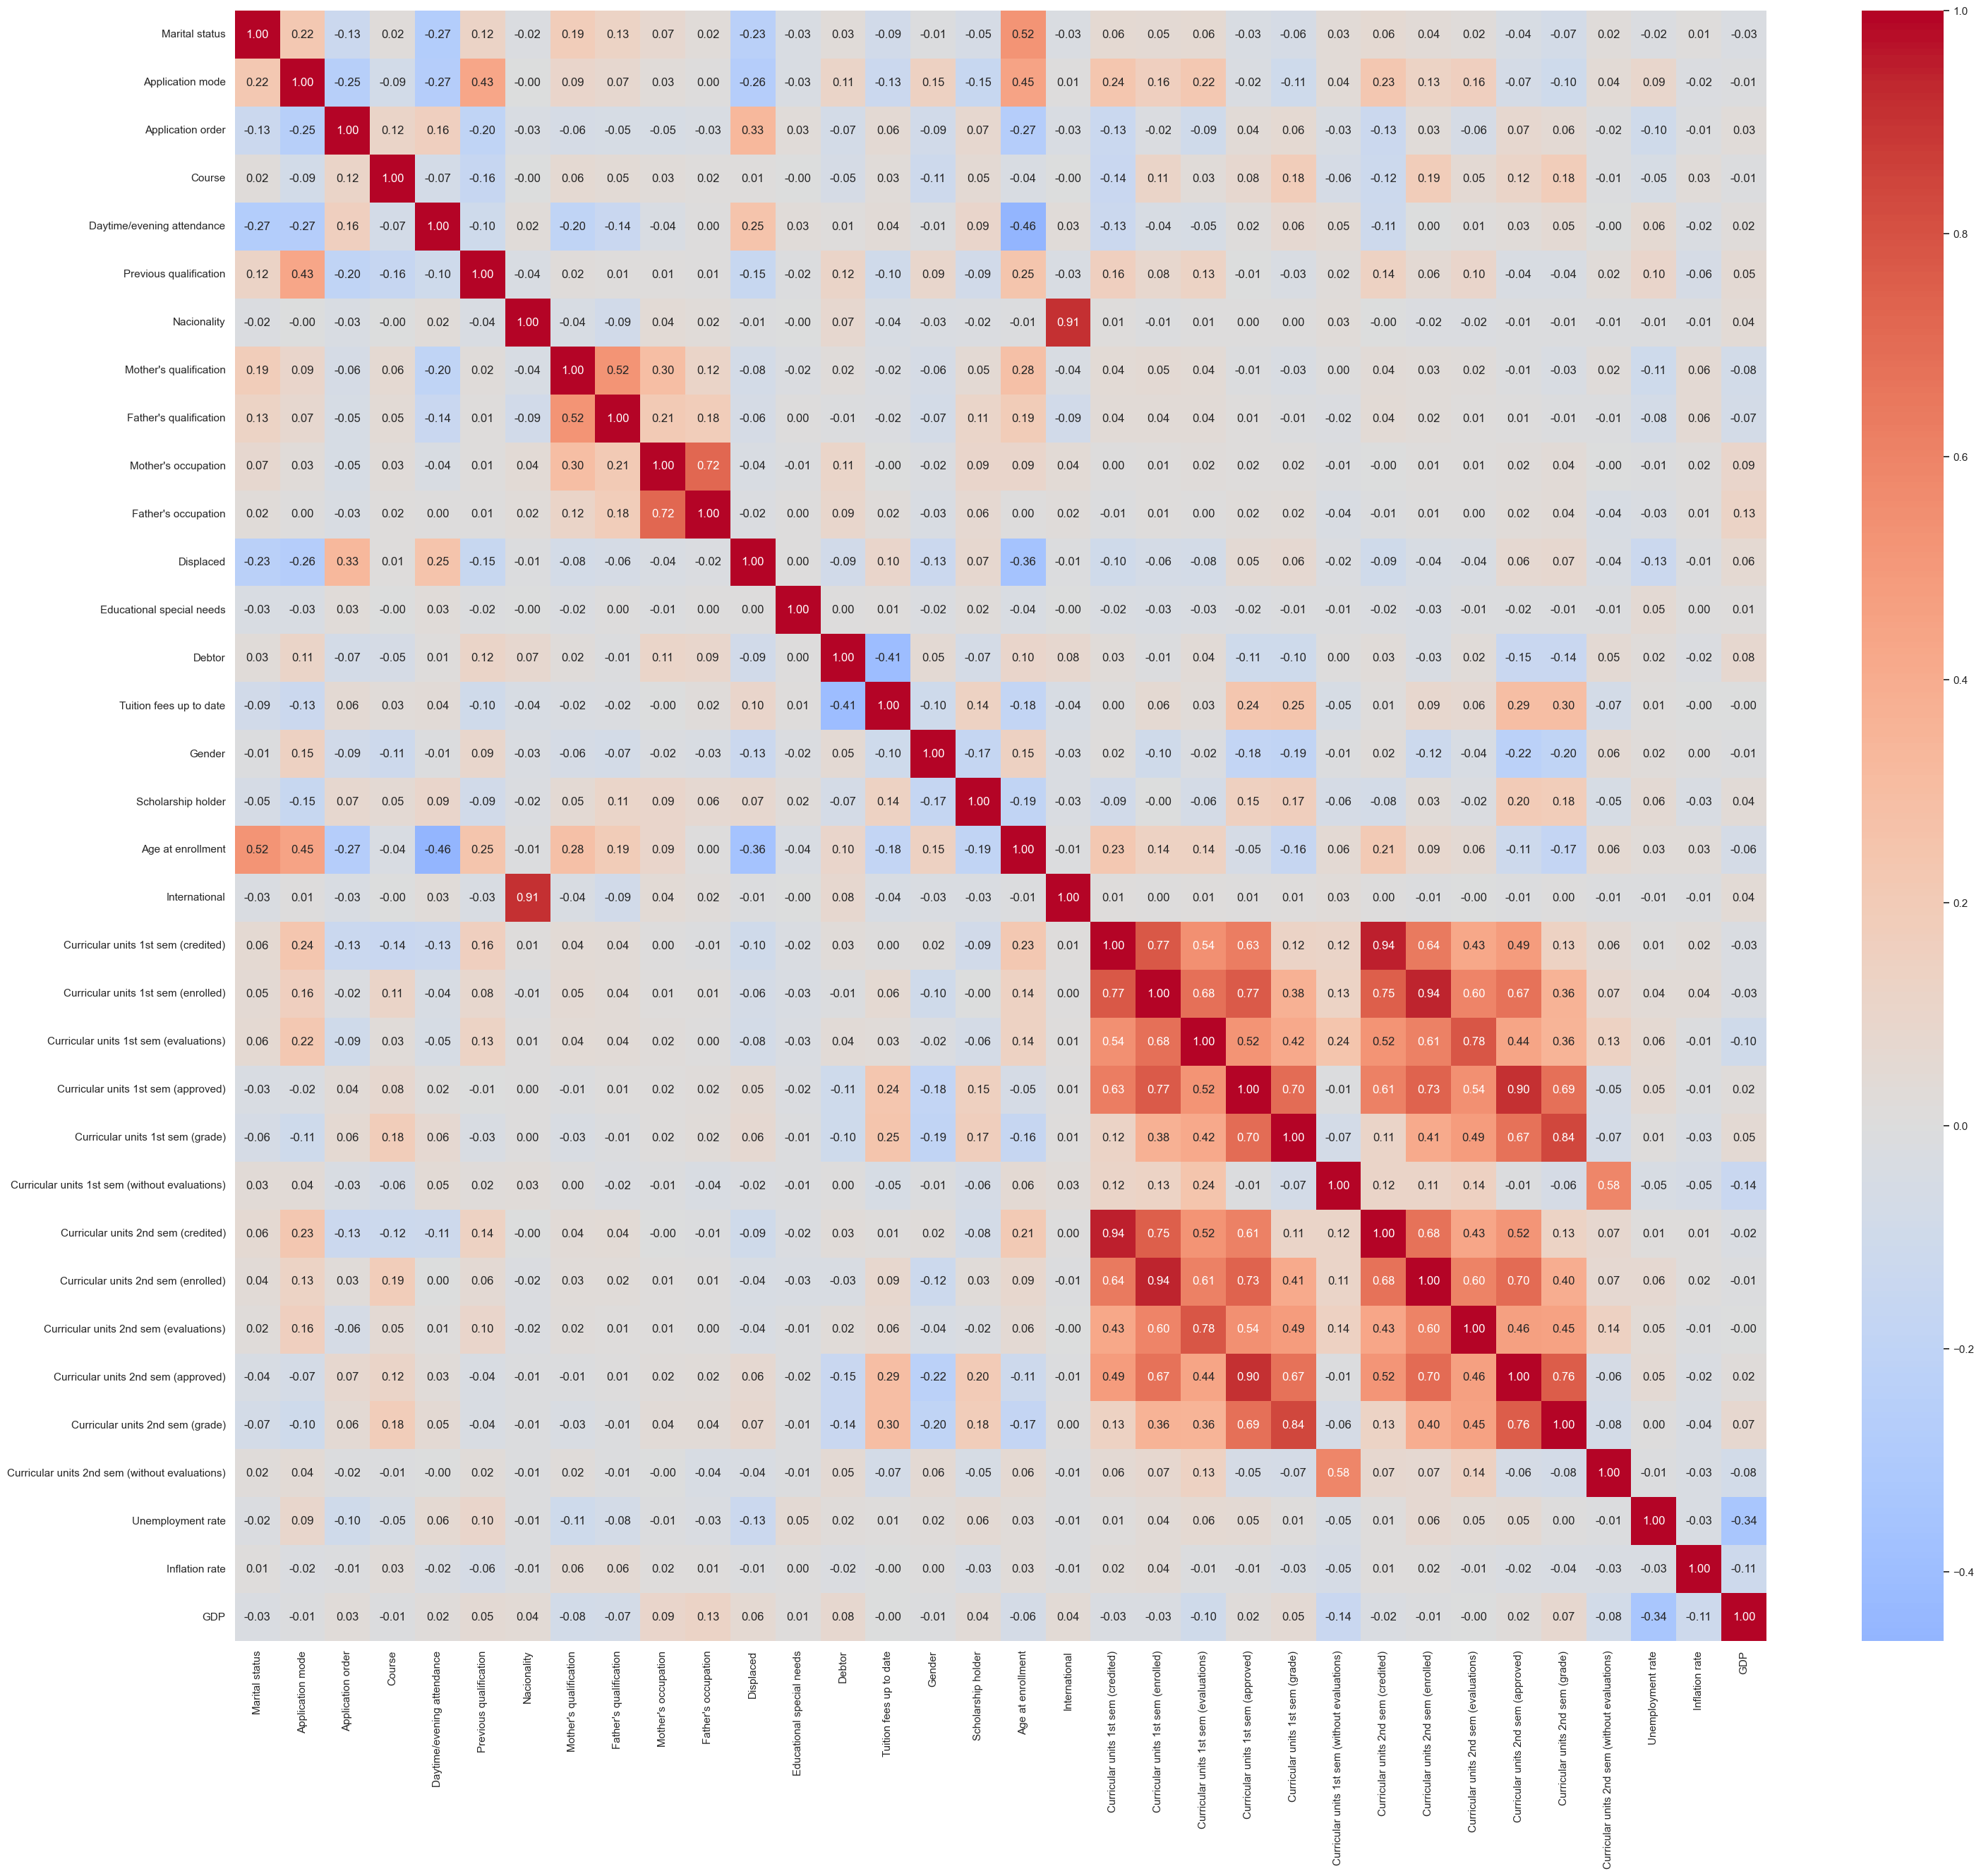

In [114]:
# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0)
plt.show()

In [115]:
df.shape

(4424, 34)

In [116]:
print("Features to keep after PCA:")
for i in range(len(keep_features)):
    print(i+1, "-", keep_features[i])


Features to keep after PCA:
1 - Marital status
2 - Age at enrollment
3 - Nacionality
4 - International
5 - Mother's qualification
6 - Father's qualification
7 - Curricular units 1st sem (enrolled)
8 - Curricular units 1st sem (evaluations)
9 - Curricular units 1st sem (credited)
10 - Curricular units 1st sem (approved)


Confusion Matrix:
[[249  19  48]
 [ 42  36  73]
 [ 14  21 383]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.79      0.80       316
    Enrolled       0.47      0.24      0.32       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



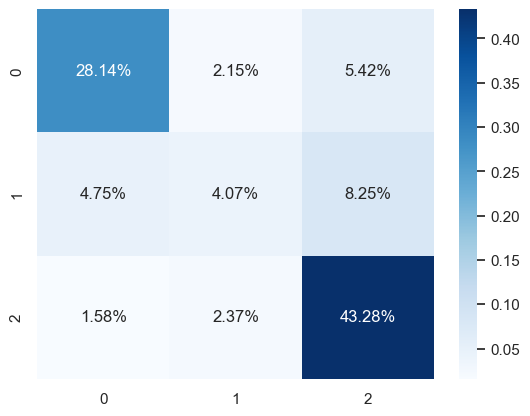

In [117]:
# select the features to keep
keep_features = ['Marital status', 'Age at enrollment', 'Nacionality', 'International', 
                 "Mother's qualification", "Father's qualification", 
                 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 
                 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)']
df.reset_index(drop=True, inplace=True)
# subset the original dataframe to keep only the selected features
df_pca = df[keep_features]

# standardize the data
scaled_data = StandardScaler().fit_transform(df_pca)

# apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# create a new dataframe to store the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# concatenate the principal components with the original dataframe
final_df = pd.concat([pca_df, df_pca], axis = 1)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)


# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model
print('Confusion Matrix:')
cf_matrix=confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

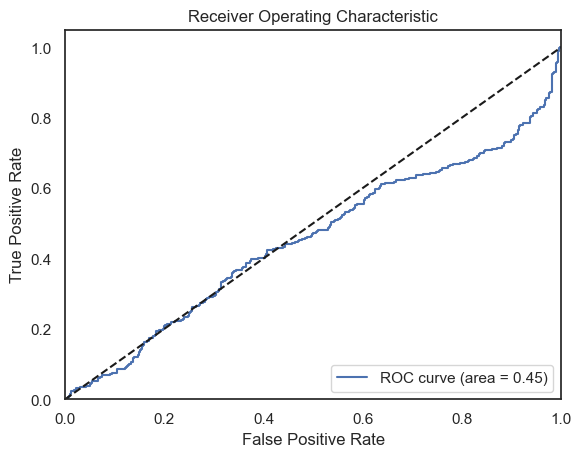

In [118]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_pred_proba = clf.predict_proba(X_test)

# calculate false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="Dropout")

# calculate AUC score
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [119]:
final_df

,PC1,PC2,Marital status,Age at enrollment,Nacionality,International,Mother's qualification,Father's qualification,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (credited),Curricular units 1st sem (approved)
0,-3.242225,-0.196130,1,20,1,0,13,10,0,0,0,0
1,-0.550878,0.992041,1,19,1,0,1,3,6,6,0,6
2,-1.778477,-0.924317,1,19,1,0,22,27,6,0,0,0
3,0.025610,-0.682910,1,20,1,0,23,27,6,8,0,6
4,0.620009,-2.178521,2,45,1,0,22,28,6,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.607326,1.029165,1,19,1,0,1,1,6,7,0,5
4420,-0.666616,9.828276,1,18,19,1,1,1,6,6,0,6
4421,0.585187,-0.980552,1,30,1,0,22,27,7,8,0,7
4422,-0.675496,-0.738851,1,20,1,0,22,27,5,5,0,5


Confusion Matrix:
[[241  28  47]
 [ 36  51  64]
 [  9  16 393]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.76      0.80       316
    Enrolled       0.54      0.34      0.41       151
    Graduate       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



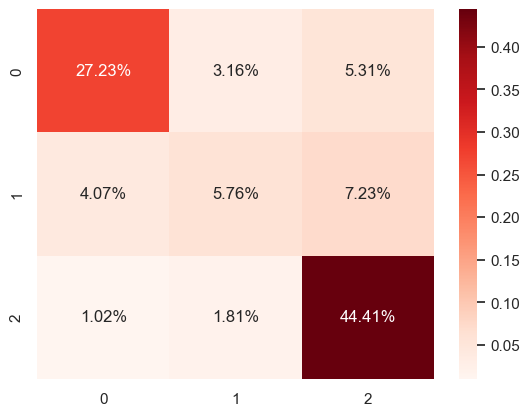

In [120]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# make predictions on the test set
y_pred = rf.predict(X_test)

# evaluate the model
print('Confusion Matrix:')
rf_matrix=confusion_matrix(y_test, y_pred)
print(rf_matrix)
sns.heatmap(rf_matrix/np.sum(rf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



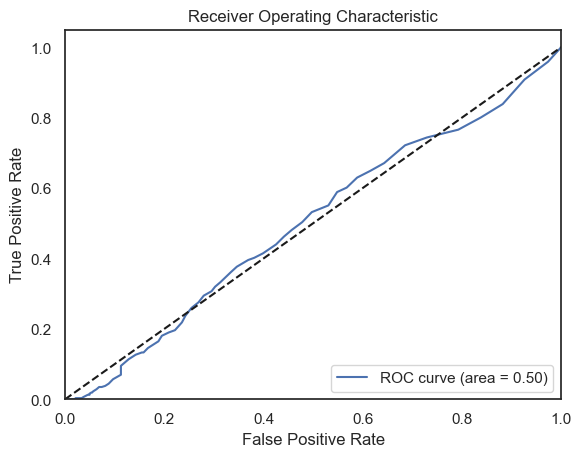

In [121]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_pred_proba = rf.predict_proba(X_test)

# calculate false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="Dropout")

# calculate AUC score
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[205  60  51]
 [ 35  61  55]
 [ 36  38 344]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.65      0.69       316
    Enrolled       0.38      0.40      0.39       151
    Graduate       0.76      0.82      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.69      0.69      0.69       885



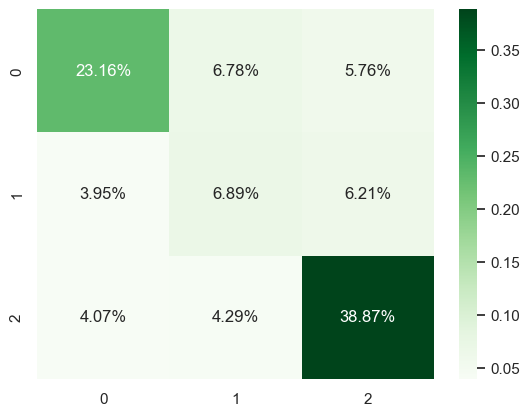

In [122]:
from sklearn.tree import DecisionTreeClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt.predict(X_test)

# evaluate the model
print('Confusion Matrix:')
dt_matrix = confusion_matrix(y_test, y_pred)
print(dt_matrix)
sns.heatmap(dt_matrix/np.sum(dt_matrix), annot=True, 
            fmt='.2%', cmap='Greens')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

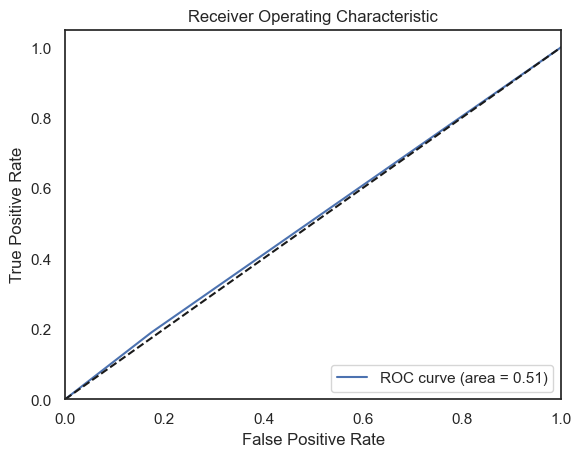

In [123]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_pred_proba = dt.predict_proba(X_test)

# calculate false positive rate, true positive rate and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="Dropout")

# calculate AUC score
auc_score = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [124]:
##Conclusion 
#From the three models, the random forest classifier had the highest accuracy of 0.77
#and also showed the best performance in terms of precision and recall for all three classes.
#The decision tree classifier had the lowest accuracy of 0.69 and also showed the lowest performance 
#in terms of precision and recall for all three classes. The logistic regression classifier had an
#accuracy of 0.75 and showed relatively balanced performance across all three classes.
#Overall, it seems that the random forest classifier is the best model among the three for this problem.